In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.DataSet import DataSet
from tools.ModelTester import ModelTester
from models import Models
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

In [3]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

dataset.shuffle()
train_set, test_set = dataset.stratified_split([0.7])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
...,...
Ulmus_Bergmanniana,10
Quercus_Nigra,10
Salix_Intergra,10
Quercus_Infectoria_sub,10


Train set : 693 - Number of classes : 99
Train set : 297 - Number of classes : 99


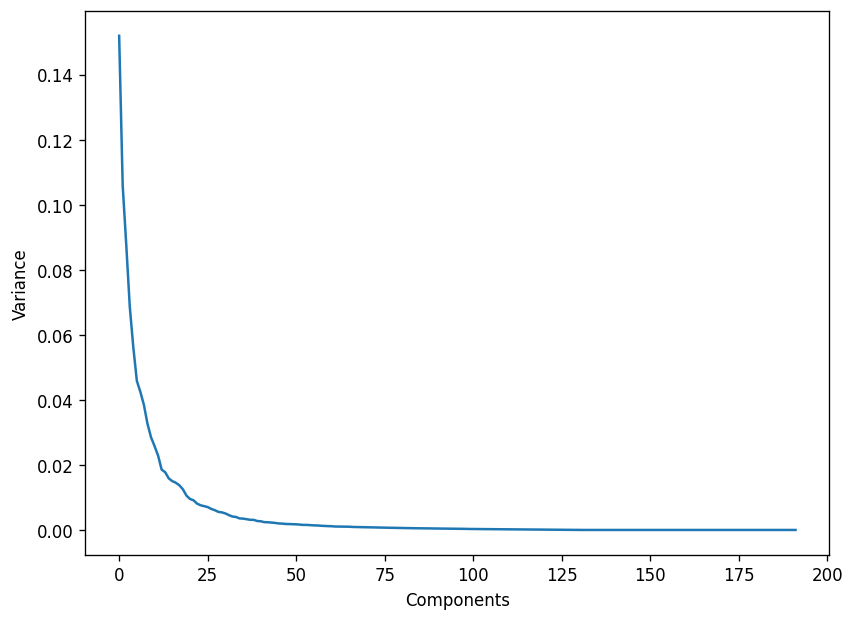

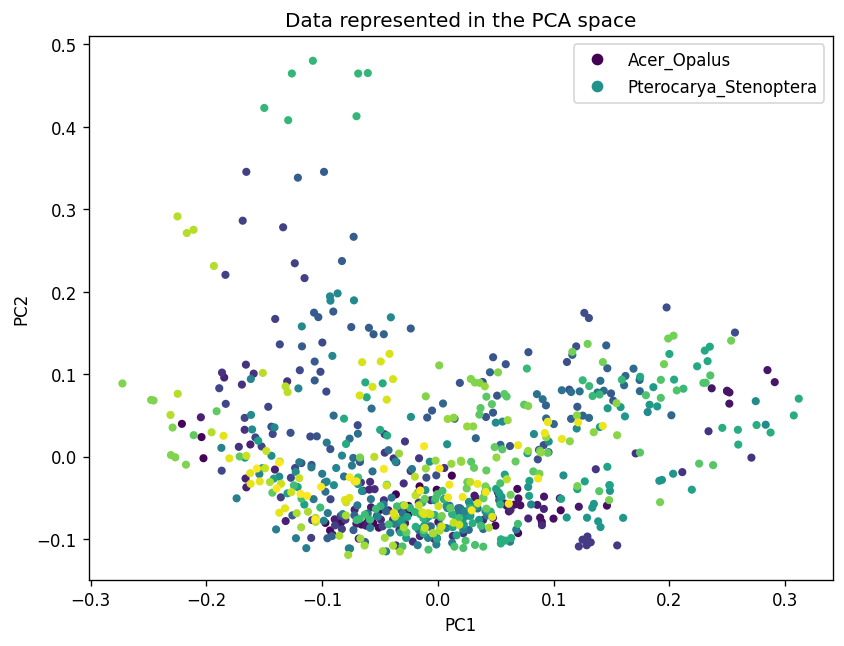

In [4]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

In [5]:
# Logistic Regression :
mt = ModelTester("LogisticClassifier")
mt.test(dataset, train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression")
mt.test(dataset, train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron")
mt.test(dataset, train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine")
mt.test(dataset, train_set, test_set)

In [ ]:
# Random Forest
mt = ModelTester("RandomForest")
mt.test(dataset, train_set, test_set)

# Ada Boost
mt = ModelTester("AdaBoost")
mt.test(dataset, train_set, test_set)

# Gradient Boosted Trees
# mt = ModelTester("GradientBoostedTrees")
# mt.test(dataset, train_set, test_set)

In [ ]:
mt = ModelTester("MultiLayerPerceptron")
mt.test(dataset, train_set, test_set)

In [ ]:
from models.Models import *

# Load Test Data
test_dl = DataLoader("data/test.csv", class_col_name="id")
test_dl.load()
submission_set = test_dl.get_dataset()

In [ ]:
# Best out of all
lc = LogisticClassifier(stand_trans=True)
lc.train(dataset)
probs, classes = lc.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/logi_submission.csv", index_label="id")

In [ ]:
# 2nd best
mlp = MultiLayerPerceptron(stand_trans=True)
mlp.train(dataset)
probs, classes = mlp.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/mlp_submission.csv", index_label="id")

In [ ]:
# 3rd best
svm = SupportVectorMachine(stand_trans=True)
svm.train(dataset)
probs, classes = svm.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/svm_submission.csv", index_label="id")

In [ ]:
rf = RandomForest(stand_trans=True)
rf.train(dataset)
probs, classes = rf.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/rf_submission.csv", index_label="id")

In [ ]:
rr = RidgeRegression(stand_trans=True)
rr.train(dataset)
probs, classes = rr.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/rr_submission.csv", index_label="id")

In [ ]:
sp = SinglePerceptron(stand_trans=True)
sp.train(dataset)
probs, classes = sp.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/sp_submission.csv", index_label="id")

In [ ]:
ab = AdaBoost(stand_trans=True)
ab.train(dataset)
probs, classes = ab.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/ab_submission.csv", index_label="id")